$$\huge\textbf{Nonlinear regression}$$

Given a vector of independent variables $X$ and a vector of dependent variables $Y$, we want to estimate the nonlinear dependence 

$$ Y = F(x,\beta) \quad \text{where } F  \text{ is a non linear function, } \beta \text{ a vector of parameters.} $$

This generalizes the usual linear regression $Y =  X\beta + \alpha$.

In [7]:
%matplotlib inline 
#It guarantees that Jupyter plots your charts
import numpy as np                        #Math and statistics library
import pandas as pd                       #Data handling library
import random as rd    
import matplotlib.pyplot as plt           #Graphing library
from scipy import stats                   #simple linear regression
from scipy.optimize import curve_fit      #nonlinear regression
from scipy.optimize import least_squares  #nonlinear regression

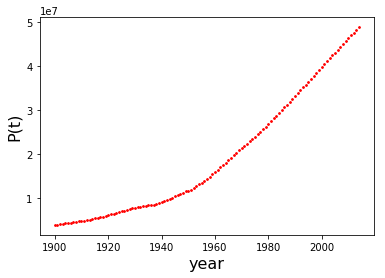

In [12]:
# Open the data

datos = pd.read_csv('Datos Tarea 1_1.csv',names=['year','population'])
plt.xlabel('year', fontsize=16) , plt.ylabel('P(t)', fontsize=16)
plt.scatter(datos['year'],datos['population'],s=3,c='r')             #s=size of dots,c=color

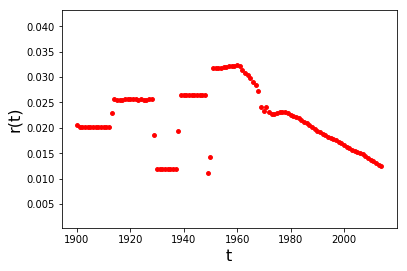

In [13]:
#Compute the slopes of the data

dpdt = []
for i in range(1,len(datos['year'])-1):
    dpdt.append((datos['population'][i+1]-datos['population'][i-1])/(datos['year'][i+1]-datos['year'][i-1]))
dpdt.insert(0,dpdt[0])
dpdt.insert(len(dpdt) , dpdt[len(dpdt)-1])
r = dpdt/datos['population']
plt.xlabel('t', fontsize=16), plt.ylabel('r(t)', fontsize=16)
plt.scatter(datos['year'],r,s=15,c='r')    

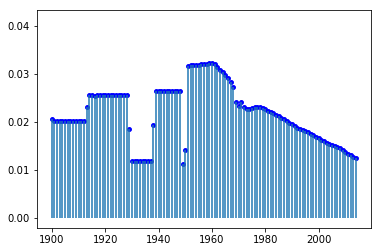

In [5]:
def lines(x,y):
    from matplotlib import collections as matcoll
    lines = []
    for i in range(0,len(x)):
        pair=[(x[i],0), (x[i], y[i])]
        lines.append(pair)

    linecoll = matcoll.LineCollection(lines)
    fig, ax = plt.subplots()
    ax.add_collection(linecoll)

    return plt.scatter(x,y,s=15,c='b',label='data')
lines(datos['year'],r)

In [6]:
r0=[0.021897,0.01293]
r.mean()

0.021897926873163633

In [7]:
def pickr(r0):
    t0,P0=datos['year'][0],datos['population'][0]
    P_t=[P0*np.exp(r0*(t-t0)) for t in datos['year']]
    plt.xlabel('t', fontsize=16)
    plt.ylabel('r(t)', fontsize=16)
    return plt.plot(datos['year'],datos['population'],'r--',datos['year'],P_t)    

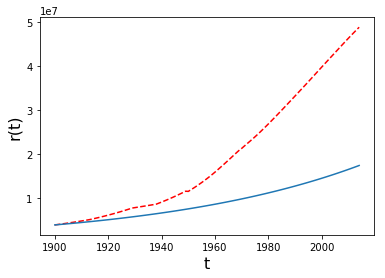

In [8]:
pickr(0.01293)

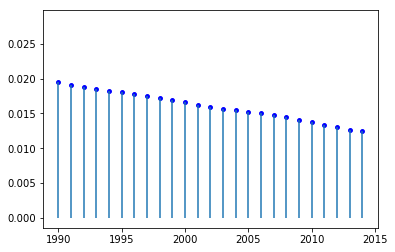

In [9]:
index=list(datos['year']).index(1990) #get index of 1990
newr=list(r[index:])                        #subset after 1990
nyears=list(datos['year'][index:])
lines(nyears,newr)

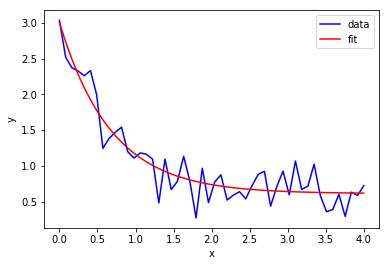

In [10]:
#an example of nonlinear regression with curve_fit
def func(x,a,b,c):
    return a*np.exp(-b*x)+c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)                  #popt gives the coefficients of the regression, pcov is the covariance matrize
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

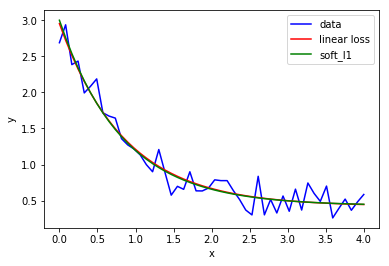

In [11]:
#an example of nonlinear regression with least_squares
def func(x,a,b,c):
    return a*np.exp(-b*x)+c

xdata = np.linspace(0, 4, 50)
yd = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = yd + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

#a function to compute the residuals:
def fun(x,t,y):
    return x[2] + x[0] * np.exp(-x[1] * t) - y

x0=np.ones(3) #initial estimate
res_lsq = least_squares(fun, x0, args=(xdata, ydata))  #least squares
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(xdata, ydata)) #robust least squares, with inlier residuals lower than 0.1

plt.plot(xdata, func(xdata, *res_lsq.x), 'r-', label='linear loss')
plt.plot(xdata, func(xdata, *res_robust.x), 'g', label='soft_l1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
res_lsq.x, res_robust.x, popt

(array([ 2.53191987,  1.16584942,  0.42139085]),
 array([ 2.57149036,  1.21111008,  0.42889144]),
 array([ 2.39732965,  1.47352065,  0.61138995]))

C:\Users\ccchicac\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


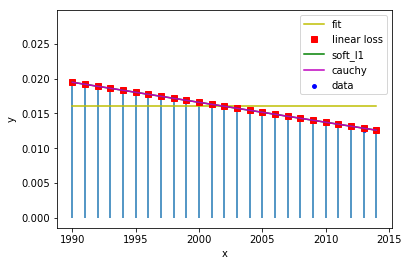

In [13]:
#non linear regression for the model a model of r(t)=a*exp(-b*x)+c
def func(x,a,b,c):
    return a*np.exp(-b*x)+c

xdata = np.array([np.float(t) for t in nyears])
ydata = np.array([np.float(t) for t in newr])
#plt.plot(xdata, ydata, 'b-', label='data')
lines(xdata,ydata)

#a function to compute the residuals:
def fun(x,t,y):
    return x[2] + x[0] * np.exp(-x[1] * t) - y

x0=0.01*np.ones(3) 
res_lsq = least_squares(fun, x0, args=(xdata, ydata)) 
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(xdata, ydata))
res_cauchy = least_squares(fun, x0, loss='cauchy', f_scale=0.1, args=(xdata, ydata))
popt, pcov = curve_fit(func, xdata, ydata)                  

plt.plot(xdata, func(xdata, *popt), 'y-', label='fit')
plt.plot(xdata, func(xdata, *res_lsq.x), 'rs', label='linear loss')
plt.plot(xdata, func(xdata, *res_robust.x), 'g', label='soft_l1')
plt.plot(xdata, func(xdata, *res_cauchy.x), 'm-', label='cauchy')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [58]:
#Remuestreo de parámetros hacia atrás:
A,B,C=[],[],[]
for t in range(15,26):
    def func(x,a,b,c):
        return a*np.exp(-b*x)+c

    global xdata
    xdata = np.array([np.float(t) for t in nyears])
    xdata=xdata[:t]
    ydata = np.array([np.float(t) for t in newr])
    ydata=ydata[:t]
    
    #a function to compute the residuals:
    def fun(x,t,y):
        return x[2] + x[0] * np.exp(-x[1] * t) - y

    x0=0.01*np.ones(3) 
    res_lsq = least_squares(fun, x0, args=(xdata, ydata)) 
    res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(xdata, ydata))
    res_cauchy = least_squares(fun, x0, loss='cauchy', f_scale=0.1, args=(xdata, ydata))
    A.append(res_lsq.x[0]),A.append(res_robust.x[0]),A.append(res_cauchy.x[0])
    B.append(res_lsq.x[1]),B.append(res_robust.x[1]),B.append(res_cauchy.x[1])
    C.append(res_lsq.x[2]),C.append(res_robust.x[2]),C.append(res_cauchy.x[2])


#Un modelo que ajusta el problema sería 1.5607*exp(-0.00049*x)-0.5602---> res_robust.x
means=[np.mean(A),np.mean(B),np.mean(C)]
std=[np.std(A),np.std(B),np.std(C)]
#suponemos entonces que los parámetros a,b,c son variables aleatorias de la forma â=mean(A)+e_a con e_a~N(0,var(A))
z=[] #realizaciones normales de los valores
for l in range(0,len(means)):
    z.append(np.random.normal(means[l],std[l]/np.sqrt(10),50))
#solución de la ecuación diferencial p(t)=c0*e^(-a/b e^(-bt) + ct)
def value(w):
    global funciones
    funciones=[]
    for k in range(0,50):
        v=datos['population'][index]*np.exp(-(z[0][k]/z[1][k])*(np.exp(-z[1][k]*w)-np.exp(-z[1][k]*1990))+z[2][k]*(w-1990))
        funciones.append(v)

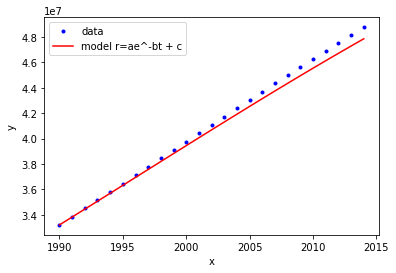

In [77]:
#graphing a realization of the function
approx=[]
for n in range(0,len(datos['year'][index:])):
    value(1990+n)
    approx.append(funciones[37])
plt.plot(datos['year'][index:],datos['population'][index:],'b.',label='data')
plt.plot(datos['year'][index:],approx,'r',label='model r=ae^-bt + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
plt.figure(1)
value(2064)
plt.subplot(121)
fig1=np.hstack(funciones)
plt.hist(fig1,bins='auto')
plt.title('Predicciones año 2064')

value(2114)
plt.subfigure(122)
fig2=np.hstack(funciones)
plt.hist(fig2,bins='auto')
plt.title('Predicciones año 2114')


plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [217]:
for t in res_lsq.x:
    print(t)

0.919570390168
-1943.71181917


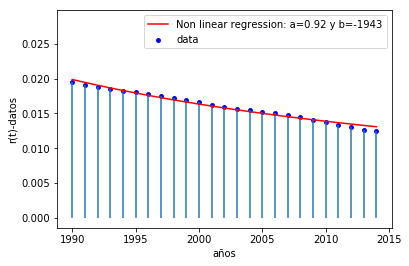

In [225]:
#non linear regression for the model a model of r(t)=a +b/x
def func(x,a,b):
    return a/(b+x)

xdata = np.array([np.float(t) for t in nyears])
ydata = np.array([np.float(t) for t in newr])
#plt.plot(xdata, ydata, 'b-', label='data')
lines(xdata,ydata)

#a function to compute the residuals:
def fun(x,t,y):
    return x[0]/(x[1]+t) - y

x0=100*np.ones(2) 
res_lsq = least_squares(fun, x0, args=(xdata, ydata)) 
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(xdata, ydata)) 
popt, pcov = curve_fit(func, xdata, ydata)
res_cauchy = least_squares(fun, x0, loss='cauchy', f_scale=0.1, args=(xdata, ydata))

#plt.plot(xdata, func(xdata, *popt), 'r', label='Nonlinear regression, model: r(t)=a/(b+t)')
plt.plot(xdata, func(xdata, *res_lsq.x), 'r', label='Non linear regression: a=0.92 y b=-1943')
#plt.plot(xdata, func(xdata, *res_robust.x), 'g', label='soft_l1')
#plt.plot(xdata, func(xdata, *res_cauchy.x), 'y^', label='Cauchy')

plt.xlabel('años')
plt.ylabel('r(t)-datos')
plt.legend()
plt.show()

In [227]:
list(datos['year']).index(2014)

114

In [209]:
#Remuestreo de parámetros hacia atrás:
A,B,C=[],[],[]
for t in range(15,26):
    xdata = np.array([np.float(t) for t in nyears])
    xdata=xdata[:t]
    ydata = np.array([np.float(t) for t in newr])
    ydata=ydata[:t]
    
    #a function to compute the residuals:
    def fun(x,t,y):
        return x[0]/(x[1]+t) - y

    x0=100*np.ones(2) 
    res_lsq = least_squares(fun, x0, args=(xdata, ydata)) 
    res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(xdata, ydata))
    res_cauchy = least_squares(fun, x0, loss='cauchy', f_scale=0.1, args=(xdata, ydata))
    A.append(res_lsq.x[0]),A.append(res_robust.x[0]),A.append(res_cauchy.x[0])
    B.append(res_lsq.x[1]),B.append(res_robust.x[1]),B.append(res_cauchy.x[1])
#Un modelo que ajusta el problema sería 1.5607*exp(-0.00049*x)-0.5602---> res_robust.x
means=[np.mean(A),np.mean(B)]
std=[np.std(A),np.std(B)]
#suponemos entonces que los parámetros a,b,c son variables aleatorias de la forma â=mean(A)+e_a con e_a~N(0,var(A))
z=[] #realizaciones normales de los valores

for l in range(0,len(means)):
    z.append(np.random.normal(means[l],std[l],1000))  #realización de los 1000 valores aleatorios de a y b

def value(w):
    global funciones
    funciones=[]                    #1000 solucines de la ecuación diferencial 
    for k in range(0,1000):
        v=datos['population'][index]*((w+z[1][k])/(1990+z[1][k]))**(z[0][k])
        funciones.append(v)

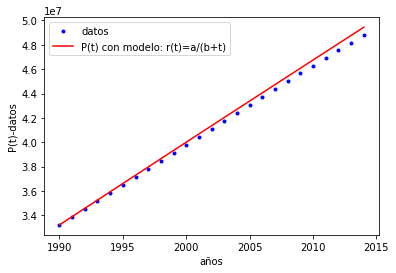

In [228]:
approx=[]
for n in range(0,len(datos['year'][index:])):
    value(1990+n)
    approx.append(funciones[50])
plt.plot(datos['year'][index:],datos['population'][index:],'b.',label='datos')
plt.plot(datos['year'][index:],approx,'r',label='P(t) con modelo: r(t)=a/(b+t)')
plt.xlabel('años')
plt.ylabel('P(t)-datos')
plt.legend()
plt.show()

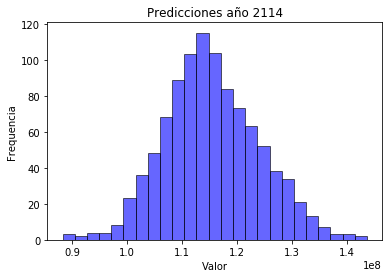

In [229]:
value(2114)
plt.hist(funciones,bins='auto',facecolor='blue',alpha=0.6,ec='black')
plt.title('Predicciones año 2114')
plt.xlabel("Valor")
plt.ylabel("Frequencia")
plt.show()

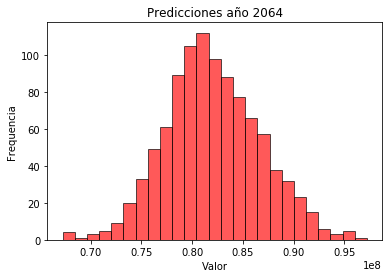

In [230]:
value(2064)
plt.hist(funciones,bins='auto',facecolor='r', alpha=0.65,ec='black')
plt.title('Predicciones año 2064')
plt.xlabel("Valor")
plt.ylabel("Frequencia")
plt.show()

In [184]:
#Remuestreo de parámetros hacia atrás:
A,B,C=[],[],[]
for t in range(15,26):
    xdata = np.array([np.float(t) for t in nyears])
    xdata=xdata[:t]
    ydata = np.array([np.float(t) for t in newr])
    ydata=ydata[:t]
    
    #a function to compute the residuals:
    def fun(x,t,y):
        return x[0]*(np.tan(-x[0]*t+x[1]) - y

    u=0.01*np.ones(2) 
    res_lsq = least_squares(fun, u, args=(xdata, ydata)) 
    res_robust = least_squares(fun, u, loss='soft_l1', f_scale=0.1, args=(xdata, ydata))
    res_cauchy = least_squares(fun, u, loss='cauchy', f_scale=0.1, args=(xdata, ydata))
    A.append(res_lsq.x[0]),A.append(res_robust.x[0]),A.append(res_cauchy.x[0])
    B.append(res_lsq.x[1]),B.append(res_robust.x[1]),B.append(res_cauchy.x[1])
#Un modelo que ajusta el problema sería 1.5607*exp(-0.00049*x)-0.5602---> res_robust.x
means=[np.mean(A),np.mean(B)]
std=[np.std(A),np.std(B)]
#suponemos entonces que los parámetros a,b,c son variables aleatorias de la forma â=mean(A)+e_a con e_a~N(0,var(A))
z=[] #realizaciones normales de los valores
for l in range(0,len(means)):
    z.append(np.random.normal(means[l],std[l],1000))
#solución de la ecuación diferencial p(t)=c0*e^(int(r(t))) r(t)=a+b/t entonces int(r)=at bln(t)
def value(w):
    global funciones
    funciones=[]
    for k in range(0,1000):
        v=datos['population'][index]*(np.cos(-z[0][k]*w+z[1][k])/cos(-z[0][k]*1990+z[1][k]))
        funciones.append(v)

SyntaxError: invalid syntax (<ipython-input-184-0a2aa22f650e>, line 13)

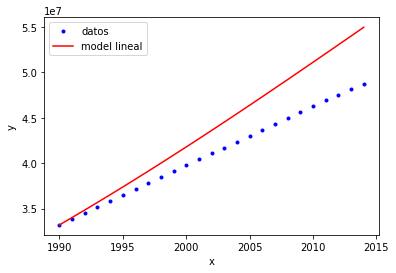

In [208]:
approx=[]
for n in range(0,len(datos['year'][index:])):
    value(1990+n)
    approx.append(funciones[900])
plt.plot(datos['year'][index:],datos['population'][index:],'b.',label='datos')
plt.plot(datos['year'][index:],approx,'r',label='model r(t)=a/(b+t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

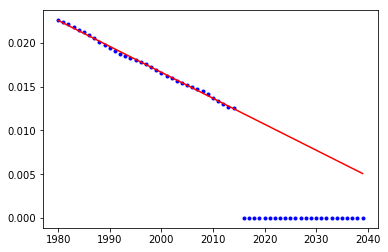

In [174]:
#linear regression for the model of r(t)
slope, intercept, r_value, p_value, std_err = stats.linregress(nyears,newr)
r_t=[intercept+slope*t for t in nyears]
for t in range(2016,2040):
    r_t.append(intercept+slope*t)
    nyears.append(t)
    newr.append(0)
plt.plot(nyears,newr,'b.',nyears,r_t,'r')

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t):
    derivs = [      # list of dy/dt=f functions
             (intercept+slope*t)*y]
    return derivs

# Bundle initial conditions for ODE solver
y0 = [P0]

# Make time array for solution
tStop = 200.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t)

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

plt.tight_layout()
plt.show()

RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

In [11]:
a = np.array([[1,-1,2],[-3,2,-5],[0,0,1]])
b =np.array([1,0,0])
x=np.linalg.solve(a, b)


In [12]:
x1,x2,x3=np.array([1,2,-3,1,0,0]),np.array([-1,-1,2,0,1,0]),np.array([2,3,-5,0,0,1])
x[0]*x1+x[1]*x2+x[2]*x3

array([ 1., -1.,  0., -2., -3.,  0.])

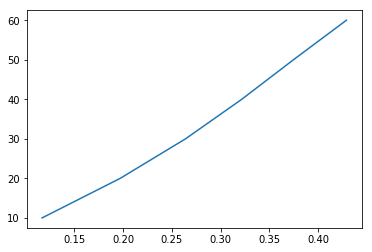

In [12]:
data = pd.read_excel('C:\\Users\\Usuario\\Downloads\\excel-1.xlsx')
plt.plot(data[data.columns[0]], data[data.columns[1]])

In [43]:
xdata

array([0.1167, 0.1969, 0.264 , 0.3217, 0.3748, 0.4292])

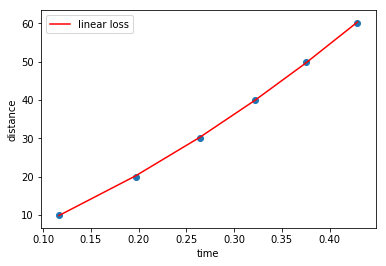

array([ -1.97490241,  85.06373276, 139.86102769])

In [52]:
xdata , ydata = list(data[data.columns[0]]), list(data[data.columns[1]])
xdata, ydata = np.array([np.float(t) for t in xdata]), np.array([np.float(t) for t in ydata])

def func(x,t):
    return x[0] + x[1]*t + x[2]*t**2 

#a function to compute the residuals:
def fun(x,t,y):
    return x[0] + x[1]*t + x[2]*t**2 - y

x0=[1,1,1] #initial estimate
res_lsq = least_squares(fun, x0, args=(xdata, ydata))  #least squares

plt.plot(xdata, func(res_lsq.x, xdata), 'r-', label='linear loss')
plt.scatter(xdata, ydata)
plt.xlabel('time'), plt.ylabel('distance'), plt.legend()
plt.show()

res_lsq.x